# SafeComm-Digital-Security-Solutions

Welcome to SafeComm Digital Security Solutions! In the modern digital age, people across the globe
communicate largely through text messages. SMSs have become an integral part of our daily lives.
However, with this ease of communication, there comes a dark side: SMS-based fraud. Unsuspecting
individuals often receive malicious or scam texts intending to deceive or cause harm.
SafeComm has recently partnered with a major telecom provider that has shared anonymized SMS
data. This dataset comprises a mix of regular day-to-day messages and some potentially fraudulent
ones. The objective is to design a mechanism that identifies and flags these fraudulent messages
automatically. This way, we can warn users or even prevent these messages from being delivered
altogether.

# *Dataset features*

• Fraudulent: Binary indicator if the SMS is fraudulent (1 for Yes, 0 for No)

• SMS Text: The content of the SMS

• ID: A unique identifier for each SMS

• Date and Time: Timestamp indicating when the SMS was sent

# *Assignment*

• Perform an Explanatory data analysis (EDA) with visualization using the entire dataset..

• Preprocess the dataset (impute missing values, encode categorical features with one-hot
encoding). Your goal is to estimate whether an SMS is fraudulent

• Define whether this is a regression, classification or clustering problem, explain why and
choose your model design accordingly. Test at least 3 different models. First, create a
validation set from the training set to analyze the behaviour with the default
hyperparameters. Then use cross-validation to find the best set of hyperparameters. You
must describe every hyperparameter tuned (the more, the better)

• Select the best architecture using the right metric

• Compute the performances of the test set

• Explain your results

In [1]:
import numpy as np
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import requests
import zipfile
import os

import nltk, spacy
import re, string, unicodedata
from bs4 import BeautifulSoup
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB

from imblearn.over_sampling import RandomOverSampler


## EDA analysis ##

* Understanding the Dataset: We use python libraries to scan the dataset and gain insight of its structure

* Checking for Integrity: We scan the dataset to identify NaN values and check if the dataset is consistent

* Visualize Distribution of Data: using sns and matplotlib we can see how the data is structured in the cartesian plane

* Use pairplots for identify relationships: Apparently not necessary

# Showing the dataframe

* here we display the complete dataset in a dataframe with 4 columns:
  - *Fraudolent*: a binary value, that acts like a boolean, that assumes the value of 0 when the sms is not spam; 1 when it is fraudolent.
  - *SMS test*: a string of text, representing an sms.
  - *ID*: a unique alphanumeric code of 7 digits that represents the sms message.
  - *Date and Time*: time in which the message has been sent (it is formatted as date and time)

* Plus, for operational purposes, we needed to reformat the name of the *SMS test* and *Date and Time* columns.

In [2]:
sms_df = pd.read_csv("sms.csv")
sms_df.rename(columns={'SMS test': 'SMS_test'}, inplace=True)
sms_df.rename(columns={'Date and Time': 'Date_and_Time'}, inplace=True)
sms_df.head()

,Fraudolent,SMS_test,ID,Date_and_Time
0,0,Squeeeeeze!! This is christmas hug.. If u lik ...,1EWYRBL,2017-12-02
1,0,And also I've sorta blown him off a couple tim...,ZY4PDK7,2018-03-23
2,0,Mmm thats better now i got a roast down me! i...,KLUX2C6,2016-10-29
3,0,Mm have some kanji dont eat anything heavy ok,955HXJ0,2018-04-12
4,0,So there's a ring that comes with the guys cos...,00Q6EUC,2016-08-01


In [3]:
print("Rows:",sms_df.shape[0]) # In this way we gain knowledge about the real dimensions of the dataset in terms of rows

Rows: 5572


In [4]:
# Count NaN values in the dataset
nan_count = sms_df.isna().sum()

# Display the count of NaN values for each column
print("NaN values in each column:")
print(nan_count)

NaN values in each column:
Fraudolent       0
SMS_test         0
ID               0
Date_and_Time    0
dtype: int64


Fortunately we don't have NaN values in the dataset, so it is consistent and we do not need to impute missing values.

In [5]:
print("\nFraudolent column summary:")
print(sms_df['Fraudolent'].value_counts())

#Here we can clearly see that there are 4825 Non-Fraudolent messages and 747 Fraudolent messages.
fraudolent_count = sms_df['Fraudolent'].value_counts()[1]
non_fraudolent_count = sms_df['Fraudolent'].value_counts()[0]

percentage_fraudolent = (fraudolent_count / (fraudolent_count + non_fraudolent_count)) * 100
percentage_non_fraudolent = (non_fraudolent_count / (fraudolent_count + non_fraudolent_count)) * 100

print("Percentage of fraudolent messages:", percentage_fraudolent,'%')
print("Percentage of non-fraudolent messages:", percentage_non_fraudolent,'%')
#furthermore we have displayed the percentage of fraudolent and non-fraudolent messages in the dataset. We can see that the dataset is unbalanced, favouring non-fraudolent messages.


Fraudolent column summary:
0    4825
1     747
Name: Fraudolent, dtype: int64
Percentage of fraudolent messages: 13.406317300789663 %
Percentage of non-fraudolent messages: 86.59368269921033 %


* Here we can clearly see that there are 4825 Non-Fraudolent messages and 747 Fraudolent messages.

* Furthermore we have displayed the percentage of fraudolent and non-fraudolent messages in the dataset. We can see that the dataset is unbalanced, favouring non-fraudolent messages.

## Data Distribution and Correlations ##

* In this section, we are analyzing the distribution of data in te cartesian plane utilizing sns and matplotlib tools.

* In particular, it seems that the most interesting feature to study in the dataset (in terms of distribution analysis) is the *Fraudolent* column.

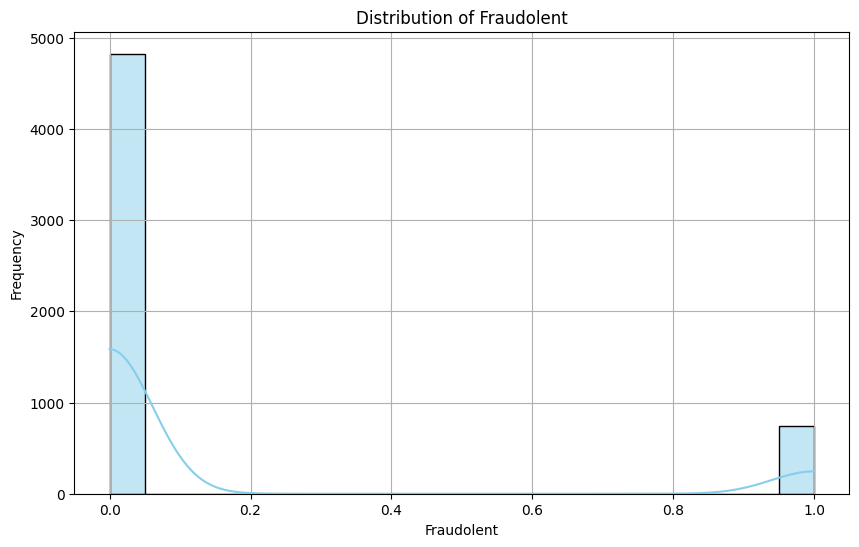

In [6]:

column_to_analyze = 'Fraudolent'

# Create a distribution plot (histogram) to visualize the data
plt.figure(figsize=(10, 6))
sns.histplot(sms_df[column_to_analyze], kde=True, bins=20, color='skyblue')
plt.title(f'Distribution of {column_to_analyze}')
plt.xlabel(column_to_analyze)
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

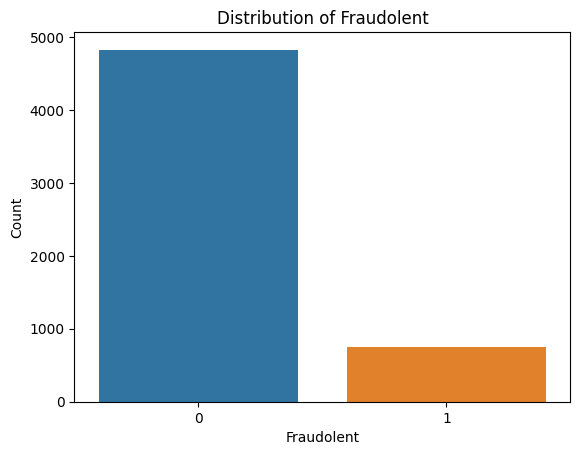

In [7]:
# Visualize the distribution of Fraudolent
sns.countplot(data=sms_df, x='Fraudolent')
plt.title('Distribution of Fraudolent')
plt.xlabel('Fraudolent')
plt.ylabel('Count')
plt.show()

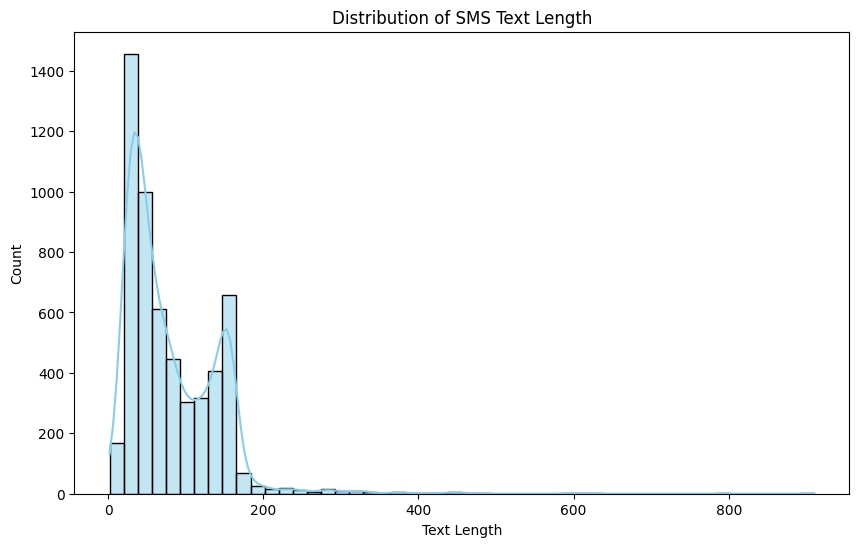

In [8]:
sms_df['text_length'] = sms_df['SMS_test'].apply(len)

# Visualize text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=sms_df, x='text_length', kde=True, bins=50, color='skyblue')
plt.title('Distribution of SMS Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

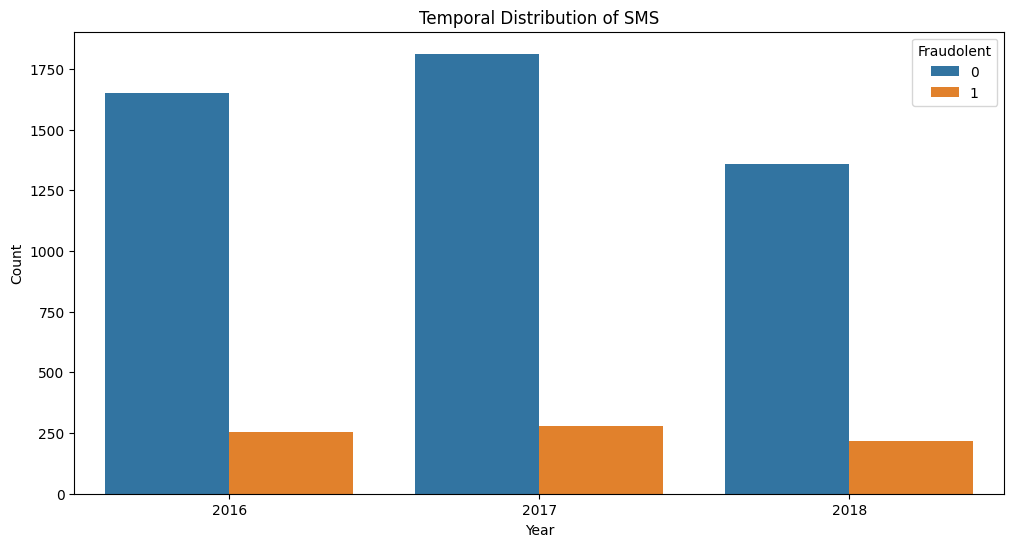

In [9]:
# Assuming the Date and Time column is named 'Date_and_Time'
sms_df['Date_and_Time'] = pd.to_datetime(sms_df['Date_and_Time'])

# Extract date and time components
sms_df['Year'] = sms_df['Date_and_Time'].dt.year
sms_df['Month'] = sms_df['Date_and_Time'].dt.month
sms_df['Day'] = sms_df['Date_and_Time'].dt.day

# Visualize temporal distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Fraudolent', data=sms_df)
plt.title('Temporal Distribution of SMS')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

<ipython-input-10-43d728a11383>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_dropped.corr()


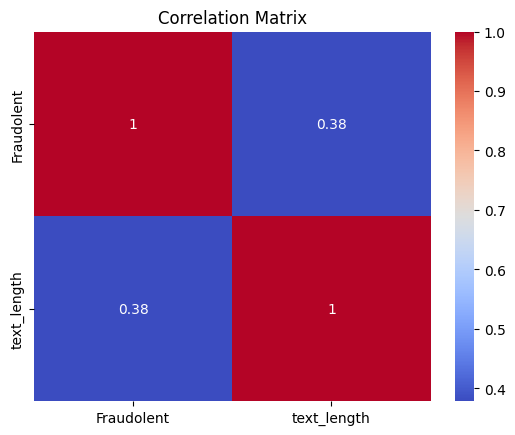

In [10]:
# Doing the correlation matrix we need only to correlate the Fraudolent feature with the text length, so we can drop the other columns (ID, Date_and_Time, Year, Month, Day)
df_dropped = sms_df.drop(['Year', 'Month', 'Day', 'ID', 'Date_and_Time'], axis=1, inplace=False)
correlation_matrix = df_dropped.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Given the correlations calculated, we can see that there is no strong correlation whatsoever between text_length and Fraudolent values. This means that we can use all of them for our analysis.
#We can also see that the correlation between the variables is not strong enough to cause multicollinearity issues.
#we can interpet the correlation between Fraudolent and text_length as as weak correlation at most.

In [11]:
sms_df.columns
#By splitting the date into its compoonents, we can analyze the temporal distribution of the messages.
earliest_date = sms_df['Date_and_Time'].min()
latest_date = sms_df['Date_and_Time'].max()
print("Earliest date of an SMS message sent:", earliest_date)
print("Latest date of an SMS message sent:", latest_date)
#this allows us to see that in our dataset the range of years for which we are viewing sent SMS Messages is from 2016 to 2018

sms_df.corr()
#Given the correlations calculated, we can see that there is no strong correlation whatsoever between the variables. This means that we can use all of them for our analysis.
#We can also see that the correlation between the variables is not strong enough to cause multicollinearity issues.
#we can interpet the correlation between Fraudolent and text_length as as weak correlation at most.

Earliest date of an SMS message sent: 2016-02-15 00:00:00
Latest date of an SMS message sent: 2018-09-19 00:00:00


<ipython-input-11-4f45f72fddba>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sms_df.corr()


,Fraudolent,text_length,Year,Month,Day
Fraudolent,1.000000,0.378359,0.004349,-0.004380,-0.004535
text_length,0.378359,1.000000,0.029498,-0.010077,0.014077
Year,0.004349,0.029498,1.000000,-0.304300,-0.054934
Month,-0.004380,-0.010077,-0.304300,1.000000,0.007355
Day,-0.004535,0.014077,-0.054934,0.007355,1.000000


* By analyzing the correlation matrix, we can determine the following:
    
    • The correlation coefficient ranges from -1 to 1. A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.
    
    • Positive correlation coefficients indicate that the variables tend to increase or decrease together.
    
    • Negative correlation coefficients indicate that as one variable increases, the other tends to decrease.
   
    • The closer the correlation coefficient is to 1 or -1, the stronger the correlation.
    
    • A correlation coefficient close to O indicates no or weak correlation.

* Based on the correlation matrix, we can conclude that there is no strong correlation between the two most importanto variables in the dataset. This means that all variables can be used for analysis without causing multicollinearity issues.

# Preprocessing

* In this section we will try to transform the data into a more suitable format for machine learning Algorithms, using various methods: cleaning data, encoding categorial features, scaling numerical features.




In [23]:
# We adjust the balance problem, just by oversampling the Fraudolent part of the X_train
oversampler = RandomOverSampler(random_state=42)

X=df_dropped
y=df_dropped['Fraudolent']
df_X, df_y = oversampler.fit_resample(X, y)
df_X['Fraudolent'].value_counts()

0    4825
1    4825
Name: Fraudolent, dtype: int64

In [26]:
df_X_halved, _, df_y_halved, _ = train_test_split(df_X, df_y, test_size=0.5, random_state=42)

print(df_X_halved['Fraudolent'].value_counts())

1    2433
0    2392
Name: Fraudolent, dtype: int64


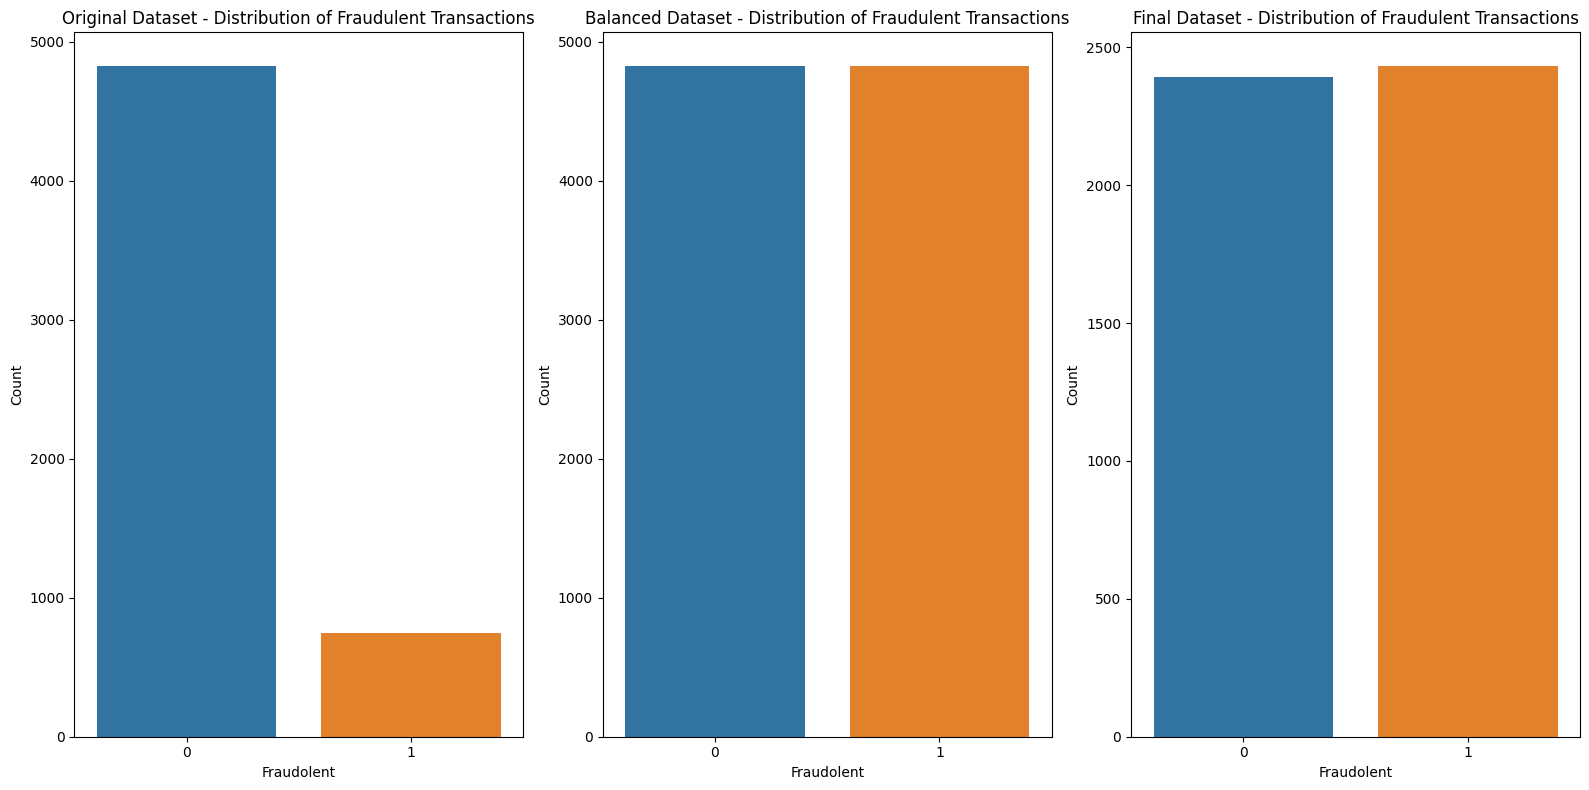

In [29]:
# Set up the figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

# Original dataset histogram
sns.countplot(x='Fraudolent', data=df_dropped, ax=axes[0])
axes[0].set_title('Original Dataset - Distribution of Fraudulent Transactions')
axes[0].set_xlabel('Fraudolent')
axes[0].set_ylabel('Count')

# balanced dataset histogram
sns.countplot(x='Fraudolent', data=df_X, ax=axes[1])
axes[1].set_title('Balanced Dataset - Distribution of Fraudulent Transactions')
axes[1].set_xlabel('Fraudolent')
axes[1].set_ylabel('Count')

# Final dataset histogram
sns.countplot(x='Fraudolent', data=df_X_halved, ax=axes[2])
axes[2].set_title('Final Dataset - Distribution of Fraudulent Transactions')
axes[2].set_xlabel('Fraudolent')
axes[2].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [30]:
#download the stopwords
nltk.download('stopwords')

#Tokenization of text
tokenizer=ToktokTokenizer()

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [44]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#apply function on SMS_test column
df_X_halved['SMS_test']=df_X_halved['SMS_test'].apply(strip_html)

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#apply function on SMS_test column
df_X_halved['SMS_test']=df_X_halved['SMS_test'].apply(remove_between_square_brackets)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#apply function on SMS_test column
df_X_halved['SMS_test']=df_X_halved['SMS_test'].apply(denoise_text)



#Define function for removing special characters
def remove_special_characters(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#apply function on SMS_test column
df_X_halved['SMS_test']=df_X_halved['SMS_test'].apply(remove_special_characters)


#stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

#apply function on SMS_test column
df_X_halved['SMS_test']=df_X_halved['SMS_test'].apply(simple_stemmer)


#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

#apply function on SMS_test column
df_X_halved['SMS_test']=df_X_halved['SMS_test'].apply(remove_stopwords)

<ipython-input-44-0128dc406a3b>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


{'ours', 'the', 'he', 'will', 'did', 'i', 'was', 'nor', 'isn', 'our', 'there', 'that', "you'd", 'because', 'himself', 'now', 'through', 'off', 'just', 'them', 'm', 'is', 'aren', 'do', 'yourself', 'what', 'for', 'into', 'shan', 'herself', 'themselves', 'up', 'in', 'own', "shouldn't", 'its', 'with', 'they', 'it', 'yours', 'didn', 'same', 'were', 'we', 'wouldn', 'needn', "hasn't", "that'll", 'haven', 'between', 'more', 'once', 'before', 'ain', 'itself', 'on', 'during', 'me', 've', "mustn't", "you've", 'too', 'hadn', 'again', "haven't", 'my', 'about', 'shouldn', 'be', 'and', 'very', "you'll", 'her', "weren't", 'where', 'hers', 'these', 'to', 'when', 're', "shan't", 'this', 'wasn', 'won', 'some', 'how', 'll', 'below', 'or', 'at', "isn't", 'but', 'so', 'which', 'your', 'don', 'over', 'theirs', 'a', 'few', 'after', 'his', 'mightn', "won't", 'weren', "it's", 'against', "she's", 'each', 'until', 'such', "wouldn't", 'am', 'should', "should've", "aren't", 'hasn', 'of', 'can', 'mustn', "mightn't",

# Bag of Words

In [45]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

#transformed dataset
BoW_X=cv.fit_transform(df_X_halved['SMS_test'])

print('BOW_cv_train:', BoW_X.shape)



BOW_cv_train: (4825, 28441)


In [ ]:
if True:
  # rebalance
else:
  # sample as many legit as the amount of fraudolent

# output: df

ora train test split

# Models

In [41]:
from sklearn.model_selection import train_test_split

X = BoW_X
y = df_X_halved['Fraudolent']

# Split the dataset into train and test sets
# Adding the "stratify" parameter seems not changing at all the distribution of values, that anyway seems very well distributed in the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"X_train shape: {X_train.shape}, y_train_tmp shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (3860, 28452), y_train_tmp shape: (3860,)
X_test shape: (965, 28452), y_test shape: (965,)


In [55]:
# logistic regression has a pretty good accuracy on train set, but a very bad score in test set
model = LogisticRegression(penalty='l2', solver='liblinear', C=0.0001)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'C': np.logspace(-4, 4, 20),
    #'penalty': ['l1', 'l2'],
    #'solver': ['liblinear', 'saga']
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=10, cv=3, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print(best_params)


# we found some hyperparameters: "penalty" and "solver"... with random we found out that "liblinear" and "l2" are nice

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

def grid_search(X_train, y_train, cv_folds=5):

    # Define the model
    model = LogisticRegression()

    # Define the hyperparameters grid to search
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['liblinear']
        }

    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_folds, scoring='accuracy', verbose=1, n_jobs=-1)

    grid_search.fit(X_train, y_train)


    return grid_search.best_params_

best_params = grid_search(X_train, y_train)
print("Best parameters:", best_params)

model.fit(X_train, y_train)
print(model.score(X_train, y_train))

y_pred = model.predict(X_test)

print(model.score(X_test, y_test))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'C': 0.0001}
0.5461139896373057
0.5046632124352332


In [ ]:
#Classification report for bag of words
report=classification_report(y_validation,y_pred,target_names=['Positive','Negative'])
print(report)

              precision    recall  f1-score   support

    Positive       1.00      0.88      0.94       461
    Negative       0.90      1.00      0.95       503

    accuracy                           0.94       964
   macro avg       0.95      0.94      0.94       964
weighted avg       0.95      0.94      0.94       964



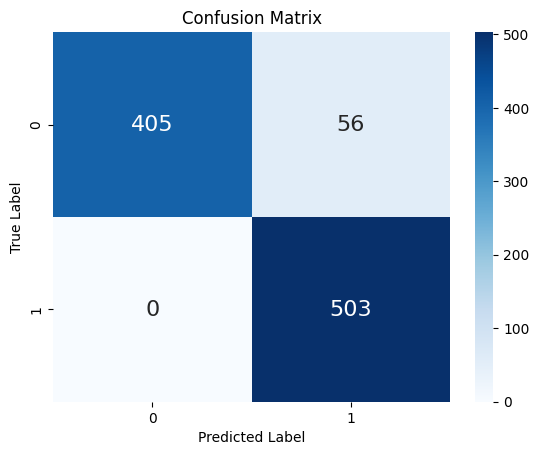

In [ ]:
cm = confusion_matrix(y_validation, y_pred)

# Display the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# using a naive bayes classifiers (MultinomialNB, very popular for text classification) the train score diminishes while the test's increases
model = MultinomialNB()
model.fit(cv_train_sms, y_train_half)
print(model.score(cv_train_sms, y_train_half))

y_pred = model.predict(cv_validation_sms)

print(model.score(cv_validation_sms, y_validation))

0.5141228297486395
0.4927385892116183


In [ ]:
# evaluation quite similar, if not identical, to the LogReg implementation
model = SVC(kernel='linear')  # also try with kernel='rbf' and gives a lil bit better results
model.fit(cv_train_sms, y_train_half)
print(model.score(cv_train_sms, y_train_half))

y_pred = model.predict(cv_validation_sms)

print(model.score(cv_validation_sms, y_validation))

0.9367711842446229
0.9336099585062241


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

model = RandomForestClassifier()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # You can choose the number of splits

# Perform k-fold cross-validation
cross_val_results = cross_val_score(model, cv_train_sms, y_train_half, cv=kfold, scoring='accuracy')

# Print the cross-validation results
print("Cross-validation results:", cross_val_results)
print("Mean accuracy:", cross_val_results.mean())

Cross-validation results: [0.48704663 0.47020725 0.53626943 0.46891192 0.53437095]
Mean accuracy: 0.49936123599658605


In [ ]:
from xgboost import XGBClassifier # quite similar to the Multinomial implementation

model = XGBClassifier()
model.fit(tv_train_sms, y_train_half)
print(model.score(tv_train_sms, y_train_half))

y_pred = model.predict(tv_test_sms)

print(model.score(tv_test_sms, y_test))

0.5006478362270018
0.8663677130044843
